#**Hypothesis Testing**

#**Case Study** : Impact of years of experience and education level on salary.

As we know, salary matters in employee satisfaction and retention. When employees are paid fairly, they are more likely to be engaged in their work and feel valued by their employer. This can lead to increased productivity, decreased turnover, and improved morale.

However, salary is just one factor that affects employee satisfaction. Other factors, such as job security, benefits, and opportunities for advancement, also play a role. Organizations must consider these factors when setting salaries to attract and retain top talent.

Here, we are concerned with answering two business questions:

* Is there any relationship between years of experience and salary? If so, how do years of experience affect salary?
* Is there any relationship between education level and salary? If so, how does education level affect salary?

To address these requests, a pearson test test along with a one-way ANOVA will enable us to determine respectively, if there is a  correlation between years of experience and salary and a statistically significant difference in salary among groups of education level. This includes:

- Using plots and descriptive statistics to check for assumption.
- Creating and fitting a linear regression model with the selected variables
- Checking model assumptions
- Performing and interpreting a one-way ANOVA test
- Comparing pairs of groups using an ANOVA post hoc test
- Interpreting model outputs and communicating the results to nontechnical stakeholders

###**Relevant Imports**

We begin by importing the relevant packages and data. As we progress, we may want to import some new ones.

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
from google.colab import drive


We load the data and start by discovering, using head and size.

In [2]:
path ='/content/drive/MyDrive/Portfolio DA/Salary_Data.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.size

40224

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [6]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


We have a minimum salary of $350 a year, it's unlikely. We will address this type of issue later on in outliers detection and data visualization.

##**Data cleaning**
We begin by displaying the data types of the columns in the dataset.

In [7]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Everything seems to be ok. Now, let's make the name of the columns consistent.

In [8]:
colnames = {'Education Level' : 'education_level',	'Job Title' :	'job_title', 'Years of Experience' : 'years_of_experience'}
df = df.rename(colnames, axis='columns')
df.columns

Index(['Age', 'Gender', 'education_level', 'job_title', 'years_of_experience',
       'Salary'],
      dtype='object')

In [9]:
df.columns = [x.lower() for x in df.columns]

In [10]:
df.head()

,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


###**Time to deal with missing data**

In [11]:
df.isnull().sum()


age                    2
gender                 2
education_level        3
job_title              2
years_of_experience    3
salary                 5
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

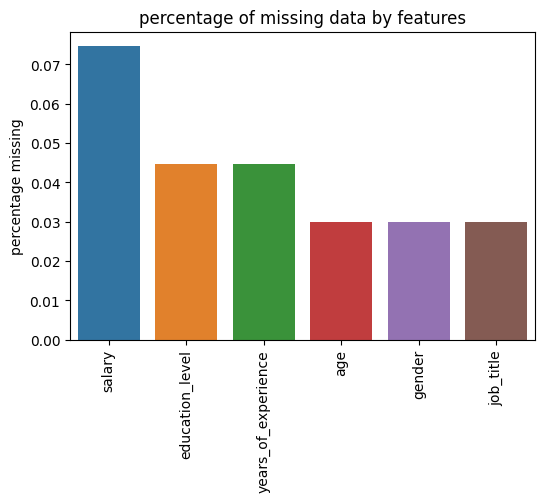

In [12]:
from matplotlib import pyplot as plt
df_na = (df.isnull().sum()/len(df))*100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(6,4))
plt.xticks(rotation=90)
sns.barplot(x=df_na.index, y=df_na)
ax.set(title='percentage of missing data by features' , ylabel='percentage missing')
plt.show

Regarding this scenario, we will use two approaches to deal with missing data:

1. Drop data
 * Drop the whole row
2. Replace data
 * Replace it by mean
 * Replace it by frequency

**Drop the whole row**

As salary, education level and years of experience widely matter, it would be appropriate to process them by deleting the whole row of data entries with missing values. Since the missing values in these columns represent less than 0.08%, 0.05%, 0.05% respectively, for salary, education level and years of experience. We can remove them safely without getting in the way of analysis. Therefore any row without value in these columns is not useful.

**Replace by mean**

Age has two missing data we can replace it with mean.

**Replace by frequency**

job title and gender can be processed with the frequency.

We replace missing value in age by the mean (average) of the column.

In [13]:
# compute the mean value for age
import numpy as np
avg_age = df['age'].mean(axis=0)
df['age'].replace(np.nan, avg_age, inplace=True)

Let's replace the missing data in job title and gender with the frequency.


In [14]:
col = ['job_title', 'gender']
for c in col:
  a=df[c].value_counts().idxmax()
  print(f"The most common type of {c} is {a} \n")

The most common type of job_title is Software Engineer 

The most common type of gender is Male 



In [15]:
df['gender'].replace(np.nan, "Male", inplace = True)
df['job_title'].replace(np.nan, "Software Engineer", inplace = True)

Now, we drop the missing data in the columns `education_level`, `years_of_experience` and `salary`.

In [16]:
df.dropna(subset=['salary', 'years_of_experience', 'education_level'], axis='index', inplace =True)

We run the following code to verify that all the missing data have been correctly addressed.

In [17]:
df.isnull().sum()

age                    0
gender                 0
education_level        0
job_title              0
years_of_experience    0
salary                 0
dtype: int64

###**Input validation**

The data has some issues with bad data, duplicate rows, and inconsistent labels.

It looks like the value in the column `education_level` need to be consistent. Let's do this.

In [18]:
df['education_level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [19]:
value_update = {"Bachelor's Degree" : "Bachelor's", "Master's Degree" : "Master's", 'phD' : 'PhD'}
df['education_level'] = df['education_level'].replace(value_update)
df['education_level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

Let's take a look in the values of the other columns.

In [20]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [21]:
df['job_title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [22]:
df['job_title'].nunique()

191

###**Duplicates**

Let's see how many duplicates there might be in the dataset.

In [23]:
df.duplicated().sum()

4912

The best approach to handle duplicates is to wonder how these duplicates might affect the analysis. Since the data were obtained from multiple sources, including surveys, job posting sites, and other publicly available sources. It was to be expected to have some data points with similar input and without getting in the way of analysis. Therefore, we've decided not to remove the duplicated values.

###**Outliers**

Now that we know which data columns we’ll use, it is time to decide which data visualization
makes the most sense for EDA of the dataset.

A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms
of salary, years of experience.
A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables,
such as years of experience and salary
A bar chart will help determine average number of salary by job title and education_level, etc.


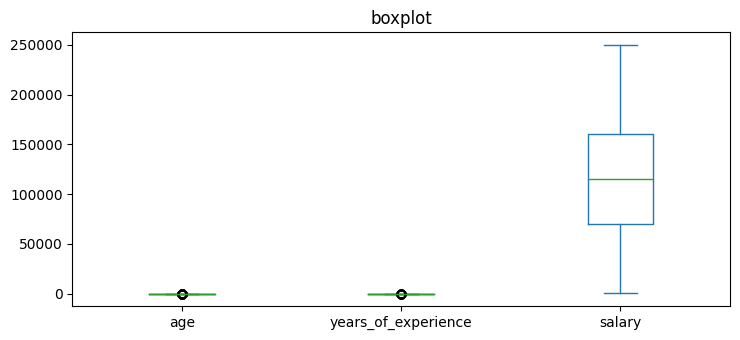

In [24]:
# Create boxplot
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
# Plot the dataframe
df[['age', 'years_of_experience', 'salary']].plot(kind='box', title='boxplot')
# Display the plot
plt.show()


Since only age and years of experience possess outliers, let's zero in on these specific columns.

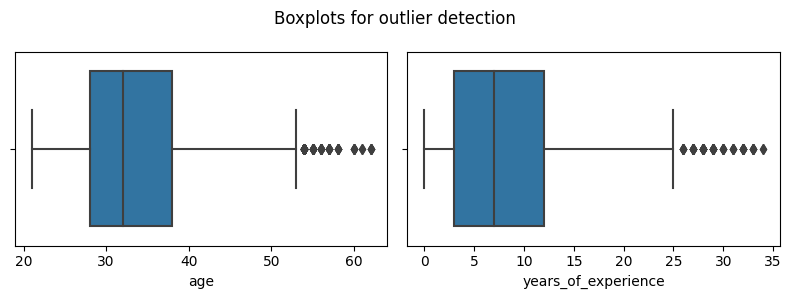

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['age'])
sns.boxplot(ax=axes[1], x=df['years_of_experience'])
plt.show();

In [26]:
# Determine the number of rows containing outliers in the three variables
continuous_list_outliers = ['age','years_of_experience']
for c in continuous_list_outliers:
  # Compute the 25th percentile value
  percentile25 = df[c].quantile(0.25)
  # Compute the 75th percentile value
  percentile75 = df[c].quantile(0.75)
  # Compute the interquartile range
  iqr = percentile75 - percentile25
  # Define the upper limit and lower limit for non-outlier values
  upper_limit = percentile75 + 1.5 * iqr
  print(f"Upper limit {c}: {upper_limit}")
  # Identify subset of data containing outliers
  outliers = df[(df[c] > upper_limit)]
  # Count how many rows in the data contain outliers
  print(f"Number of rows in the data containing outliers in {c}: {len(outliers)}")


Upper limit age: 53.0
Number of rows in the data containing outliers in age: 123
Upper limit years_of_experience: 25.5
Number of rows in the data containing outliers in years_of_experience: 75


Since we are not concerned about age in this work, we will want to ignore any outliers in this feature. In years of experience, we can consider that it's ok to find someone with more than 25 years of experience and nearly 35. With this knowledge, it's reasonable to leave these values alone and not alter them.

##**Data visualization**

Data visualization is the process of transforming data into a visual representation that helps people understand and interpret the data. In our work it will be used to identify trends and patterns in the dataset.



Time to plot education level against salary. Since `education_level` is a categorical variable and `salary` a continuous variable, a boxplot would be the best way to represent this.

<Axes: xlabel='education_level', ylabel='salary'>

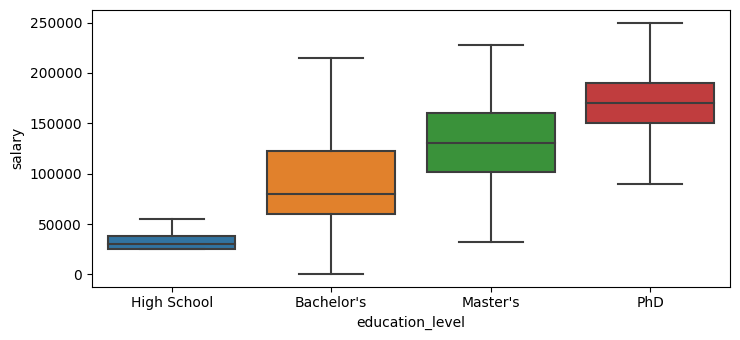

In [27]:
order = ['High School', "Bachelor's", "Master's", 'PhD']
sns.boxplot(x='education_level', y='salary', data=df, order = order, showfliers=False)

We can observe that as someone goes from High School up to PhD, his salary tend to be increased on average. This is a sign of a correlation between `education_level` and `salary`. There is considerable variation in Salary across the TV groups.

The significance of these differences can be tested with a one-way ANOVA.

The following table resumes the average salary by categories in education level.

In [28]:
box_resume = df.groupby('education_level')['salary'].mean().to_frame().reset_index().rename(columns={'salary' : 'average_salary'})
box_resume

,education_level,average_salary
0,Bachelor's,95082.908640
1,High School,36706.694196
2,Master's,130112.056452
3,PhD,165651.457999


Now we will plot this table so we can visualize the difference per category in education level through a bar graph.

We will write a function that will help us simplify the figures in the average salary column.

In [29]:
def readable_numbers(x):
  """
  takes a large number and formats it into K,M to make it more readable
  """
  if x >= 1e6:
    s = '{:1.1f}M'.format(x*1e-6)
  else:
    s = '{:1.1f}K'.format(x*1e-3)
  return s
  # Use the readable_numbers() function to create a new column



In [30]:
box_resume['avg_salary']=box_resume['average_salary'].apply(readable_numbers)
box_resume

,education_level,average_salary,avg_salary
0,Bachelor's,95082.908640,95.1K
1,High School,36706.694196,36.7K
2,Master's,130112.056452,130.1K
3,PhD,165651.457999,165.7K


Before we start plotting, we'll write a function that will help label each bar in the plot with its corresponding education level text.

In [31]:
def add_labels(x, y, labels):
  for i in range(len(x)):
    plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')



In [32]:
box_resume['avg_salary'] = box_resume['avg_salary'].astype(str)


Now we'll plot the bar graph.

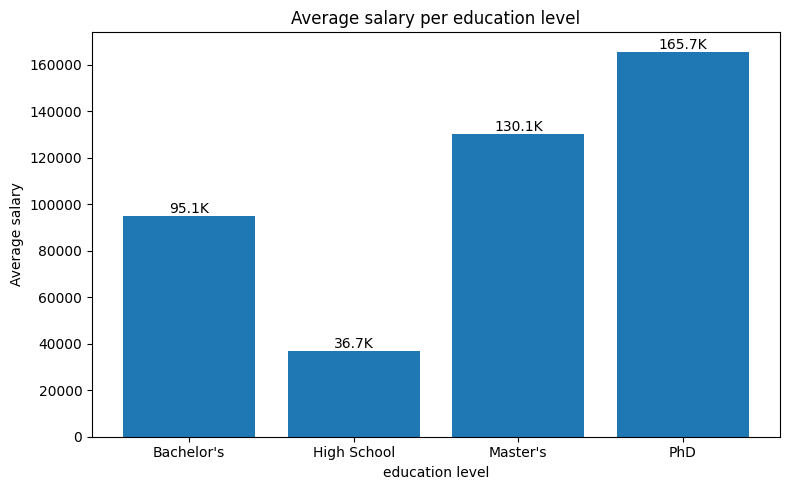

In [33]:
plt.figure(figsize=(8,5))
plt.bar(x=box_resume['education_level'], height=box_resume['average_salary'])
add_labels(box_resume['education_level'], box_resume['average_salary'], box_resume['avg_salary'])
plt.plot()
plt.xlabel('education level')
plt.ylabel('Average salary')
plt.title('Average salary per education level')
plt.show()

The plot shows us, on average, there is a difference in salary per category in education level. Later, we will go over some statistical tests to see whether this difference is statistically significant or due to chance.

**Years of experience vs Salary**

Now we will try to figure out whether it exists any trends between years of experience and salary. The best approach for this visualization would be a scatter plots.

A scatter plot is a way to display the relationship between two variables. (especially two continuous variables).

Scatter plots can be used to identify trends, patterns, and outliers in data. They can also be used to compare two or more groups of data.


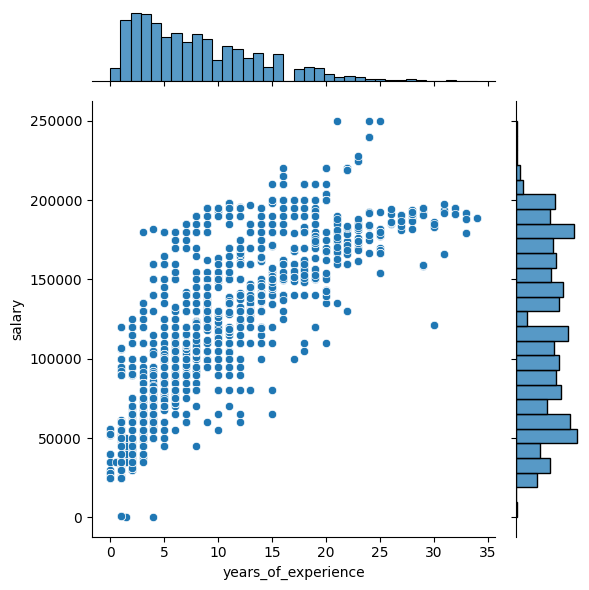

In [34]:
%matplotlib inline
sns.jointplot(x='years_of_experience', y='salary', data=df)


This visualization helps us identify a trend between the two variables. As years of experience increase, the salary seems to follow. Hence, a sign of a positive relationship between the variables.

So there are two things worth our investigation.

1. It's not to be expected to have a salary so close to 0, even though the years of experience were so close to 5. That may be an outlier or a typo.
2. We have seen people with less than five years of experience who earn $150,000 and more a year. We are tempted to see what their occupations and level of education are.

Let's dive in.

In [35]:
df[df['salary'].lt(10000)]

,age,gender,education_level,job_title,years_of_experience,salary
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0
1890,25.0,Female,Bachelor's,Front end Developer,1.0,550.0
2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0
4633,31.0,Female,Bachelor's,Junior HR Coordinator,4.0,500.0


Now, it is clear they are all typos. Such job titles don't pay so little a year. Therefore, we can remove them from our dataset.

In [36]:
df.drop([259, 1890, 2654, 4633], inplace = True)

In [37]:
# Let's verify
df[df['salary'].lt(10000)]

,age,gender,education_level,job_title,years_of_experience,salary


✅

Let's investigate the second part.

In [38]:
df[df['years_of_experience'].lt(5) & df['salary'].gt(149000)].sort_values(by='salary', ascending=False)

,age,gender,education_level,job_title,years_of_experience,salary
954,29.0,Female,Master's,Data Scientist,4.0,182000.0
945,27.0,Female,Master's,Data Scientist,3.0,180000.0
989,27.0,Male,Bachelor's,Software Engineer,4.0,160000.0
1058,27.0,Male,Bachelor's,Software Engineer,4.0,160000.0
1018,27.0,Male,Bachelor's,Software Engineer,4.0,160000.0
1028,27.0,Male,Bachelor's,Software Engineer,4.0,160000.0
1038,27.0,Male,Bachelor's,Software Engineer,4.0,160000.0
1048,27.0,Male,Bachelor's,Software Engineer,4.0,160000.0
1068,27.0,Male,Bachelor's,Software Engineer,4.0,160000.0
998,27.0,Male,Bachelor's,Software Engineer,4.0,160000.0


They hold bachelor's or master's degrees and are employed as Data Scientist, Software Engineers or Product Manager.

The next step is to run some statistical tests to confirm the relationship between the variables:
* salary and education level
* salary and years of experience.

Before moving on, it's worth examining the job title that is most commonly associated with different educational levels.

We will create a function that will allow us to create a more convenient data frame to perform this analysis.

In [39]:
def create_df(grp, agg):
  '''
  Create a list grouped by grp
  and aggregate by agg (value_counts)
  then return a DataFrame from the list.
  '''
  a = df.groupby(grp)[agg].value_counts()

  b = a.to_frame().rename(columns={'job_title' : 'number'}).reset_index()
  return b

In [40]:
# call the function to create the DataFrame
df_job = create_df('education_level', 'job_title')
df_job

,education_level,job_title,number
0,Bachelor's,Software Engineer,478
1,Bachelor's,Data Analyst,287
2,Bachelor's,Front end Developer,177
3,Bachelor's,Product Manager,156
4,Bachelor's,Back end Developer,145
...,...,...,...
267,PhD,Principal Scientist,1
268,PhD,Senior Consultant,1
269,PhD,Senior HR Manager,1
270,PhD,Senior Marketing Director,1


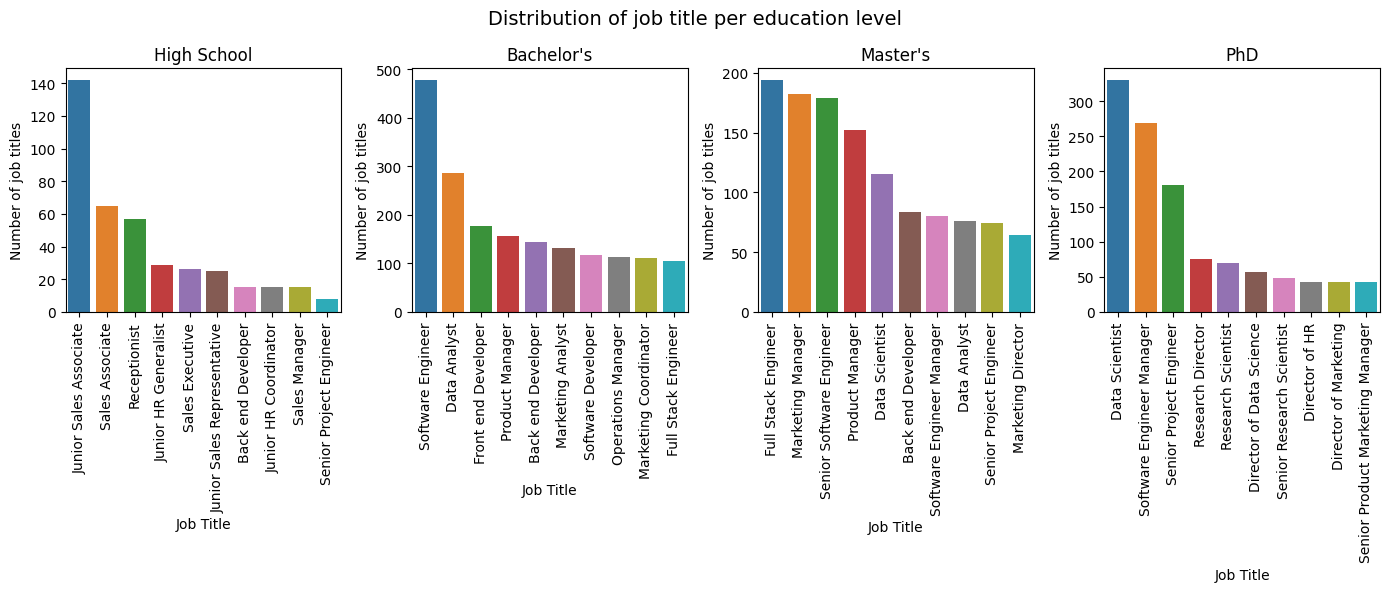

In [41]:
 # Create 4 bar plots for the distribution of job title per education level.
fig, axes = plt.subplots(nrows=1, ncols=len(['High School', "Bachelor's", "Master's",'Phd']), figsize = (14,6))
# Setting a variable to count which axis the plot should go on
idx = 0
# Loop through a list of the four category in education level
for c in ['High School', "Bachelor's", "Master's",'PhD']:
  # specify the particular education level
  educ = df_job[df_job['education_level']==c].sort_values(by='number', ascending=False, axis='index').head(10)

  # Create a bar plot
  sns.barplot(
      x=educ['job_title'],
      y=educ['number'],
      ax=axes[idx])

  # Set title
  axes[idx].set_title(c)
  # Set x-axis, y-axis label
  axes[idx].set_xlabel("Job Title")
  axes[idx].set_ylabel("Number of job titles")
  # Rotate labels on the x-axis
  axes[idx].set_xticklabels(educ['job_title'], rotation=90);
  # Add 1 to idx so on the next loop it changes to the next plot
  idx+=1
# Set the title of the whole plot
plt.suptitle('Distribution of job title per education level', fontsize = 14);

We've found some interesting insights:

- Sales are among the top job title for High School diplomas within various levels.
- Bachelor's and Master's degrees often lead to Data Analyst, Backend Developer, Full Stack Engineer, Product Manager, and Software Engineer positions.
- Data Scientist, Software Engineer Manager, and Senior Project Engineer are among the top job title for Master's degrees and Ph.D.
- Research seems to be a field only among the top job title for Ph.D.

One thing worth further investigating is how Senior Project Engineer may be shared among the top job titles for both High School and Ph.D. It's unlikely.

This dataset is awesome. We can find out so much by just exploring it. Our focus this time will be on the top 10 job titles with the highest salaries on average. Afterward, we will focus on providing the business question's answer.

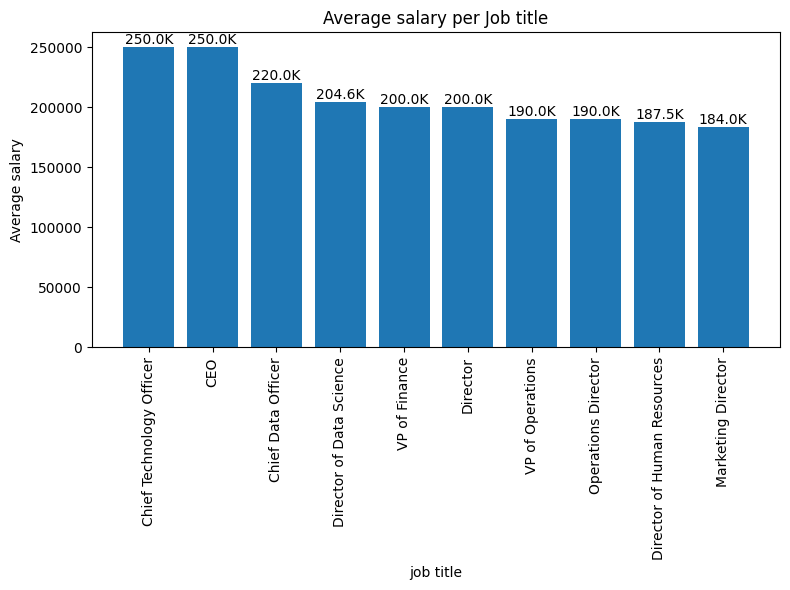

In [42]:
sal_per_job = df.groupby('job_title')['salary'].mean().sort_values(ascending=False).to_frame().reset_index().head(10)

sal_per_job['avg_salary']= sal_per_job['salary'].apply(readable_numbers)

plt.figure(figsize=(8,6))
plt.bar(x=sal_per_job['job_title'], height=sal_per_job['salary'])
add_labels(sal_per_job['job_title'], sal_per_job['salary'], sal_per_job['avg_salary'])
plt.plot()
plt.xlabel('job title')
plt.ylabel('Average salary')
plt.xticks(sal_per_job['job_title'], rotation=90)
plt.title('Average salary per Job title')
plt.show()

Management positions are the most paid job. We're tempted to take our analysis a step further, but stopping here is the price to pay for not being out-of-scope in this work. This has concluded our visualization exploration. Now, time to tackle the business questions.

##**Statistical tests**

Statistical tests are used to determine whether there is a significant difference between two or more groups. They can be used to compare means, proportions, and other statistics.

Statistical tests are important because they help us to make informed decisions about our data. Without statistical tests, we would not be able to determine whether the differences we see in our data are due to chance or if they are real.

There are many different types of statistical tests, and the right test to use depends on the type of data you have and the question you are trying to answer.

In this work, we are concerned about figuring out
- Is there any relationship between years of experience and salary? If so, how do years of experience affect salary?
- Is there any relationship between education level and salary? If so, how does education level affect salary?

Two questions with each one two-parts.

We will run some statistical tests to address the first part of each question. Depending on the answer to the first part, linear regression can address the second part of the questions.

**Is there any relationship between years of experience and salary?**

The matrix correlation will help us answer this question along with the Pearson test. We are in the presence of two continuous variables. When such appears, the Pearson test goes without saying.

**The Pearson test** is a statistical test that is used to determine the strength and direction of the linear relationship between two variables. The test is based on the Pearson correlation coefficient, which is a measure of the linear relationship between two variables.

The Pearson correlation coefficient can range from -1 to 1. A correlation coefficient of 0 indicates that there is no linear relationship between the two variables. A correlation coefficient of -1 indicates that there is a perfect negative linear relationship between the two variables. A correlation coefficient of 1 indicates that there is a perfect positive linear relationship between the two variables.

**State the null hypothesis and the alternative hypothesis.**

Null hypothesis (H0): years of experience is independent of salary. <br>
Alternative hypothesis (Ha): years of experience is NOT independent of salary.

We choose a significance level of 0.05


In [43]:
df[['salary', 'years_of_experience']].corr()

,salary,years_of_experience
salary,1.000000,0.809043
years_of_experience,0.809043,1.000000


In [44]:
pearson_coef, p_value = stats.pearsonr(df['years_of_experience'], df['salary'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.809043179858658  with a P-value of 0.0


In our case, the Pearson correlation coefficient was ~0.81. This indicates that there is a strong positive linear relationship between the two variables. In other words, as one variable increases, the other variable also tends to increase.

However, it is important to note that the Pearson correlation coefficient does not prove causation. Just because two variables are correlated does not mean that one causes the other. There may be other factors that are causing the correlation.

Since the P-value is lower than 0.05 we can be confident at more than 95% that there is a strong relationship between `salary` and `years_of_experience`. Therefore, we reject our null hypothesis.

Now let's tackle the first part of the second question. Afterward, we will see how years of experience affect salary.

**Is there any relationship between education level and salary?**

The ANOVA test is the tool that will help us address this question.

**ANOVA**, or *the analysis of variance*, is a statistical test that is used to compare the means of three or more groups. It is a very powerful test that can be used to determine if there is a significant difference between the means of the groups, in our specific scenario, education level.

We will use it to determine if there is a difference in the mean(average) salary of High School, Bachelor's, Master's, and Ph.D.

**State the null hypothesis and the alternative hypothesis.**

Null hypothesis (H0): salary is independent of education level.<br>
Alternative hypothesis (Ha): salary is NOT independent of education level.

We choose a significance level of 0.05

In [45]:
from scipy.stats import f_oneway
SelectedContPredictors=[]
CategoryGroupLists=df.groupby('education_level')['salary'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
if (AnovaResults[1] < 0.05):
    print("education_level is correlated with salary | P-Value: {}".format(AnovaResults[1]))
else:
    print(f"education_level is NOT correlated with salary | P-Value: {AnovaResults[1]}")

education_level is correlated with salary | P-Value: 0.0


Our P-value is 0.0, which indicates that we can reject our null hypothesis. Therefore, there is a strong relationship between `salary` and `education_level`. Hence, the mean of the groups is all different regarding salary.

**Resume of the statistical tests**

The tests confirmed our prior assumptions and answered the first part of the two questions.

Q1 Answer: Of course, there is a relationship between `salary` and `years_of_experience`. <br>
Q2 Answer: of course, there is a relationship between `salary` and `education_level`.

Let's see how these variables affect salary.

----
To avoid any confusion around relationship versus correlation. Adding the following has proven useful to me.

A relationship is a connection (association) between two variables. For example, there is a relationship between height and weight, as taller people tend to weigh more.

A correlation is a measure of the strength of the relationship between two variables. A correlation coefficient can range from -1 to 1.



##**Linear regression**

Linear regression is a statistical method that is used to find the line of best fit between two variables. It is often used in business and economics to predict future outcomes.

In our case, we want to understand how independent variables (education level and years of experience) affect salary through linear regression.

Here we should have the variable selection. Since we have so few variables in the dataset, the variable selection was based on the business objective.


In [46]:
# Import statsmodels and ols function
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [47]:
model = ols(formula = "salary ~ C(education_level) + years_of_experience", data = df).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     4006.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:26:16   Log-Likelihood:                -78190.
No. Observations:                6694   AIC:                         1.564e+05
Df Residuals:                    6689   BIC:                         1.564e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          6.374e+04    652.512     97.691      0.000    6.25e+04     6.5e+04
C(education_level)[T.High School] -3.814e+04   1471.387    -25.920      0.000    -4.1e+04   -3.53e+04
C(education_level)[T.Master's]     1.046e+04    897.536     11.651      0.000    8698.160    1.22e+04
C(education_level)[T.PhD]          2.131e+04   1117.885     19.067      0.000    1.91e+04    2.35e+04
years_of_experience                5796.3641     72.432     80.025      0.000    5654.374    5938.354
==============================================================================
Omnibus:                      461.800   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.444
Skew:                           0.660   Prob(JB):                    8.18e-125
Kurtosis:                       3.552   Cond. No.                         44.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Before proceeding with interpretation, we must confirm that the model's results are valid by verifying the five fundamental assumptions of multiple linear regression.

**Multiple linear regression assumptions**

<br>

1. **Linearity:** Each predictor variable (Xi) is linearly related to the outcome variable (Y).

2. **Independent observations:** Each observation in the dataset is independent.

3. **(Multivariate) normality:** The errors are normally distributed.

4. **Homoscedasticity:** The variation of the errors is constant or similar across the model.

5. **No multicollinearity:** No two independent variables (Xi and Xj) can be highly correlated with each other.

1. Our model has one continuous independent variables, the following plot confirms the linearity assumption.


In [49]:
df_mod = df[['education_level', 'years_of_experience', 'salary']]

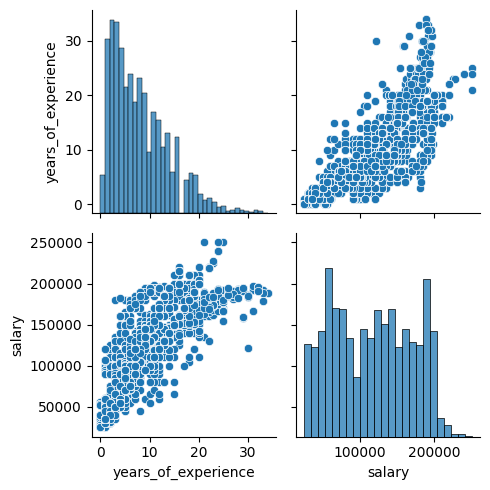

In [50]:
sns.pairplot(df_mod)

2. The independent observation assumption states that each observation in the dataset is independent. As the data were obtained from multiple sources, including surveys, job posting sites, and other publicly available sources are independent from one another, the independence assumption is not violated.

3. Next, let's verify that the normality assumption is upheld for the model.

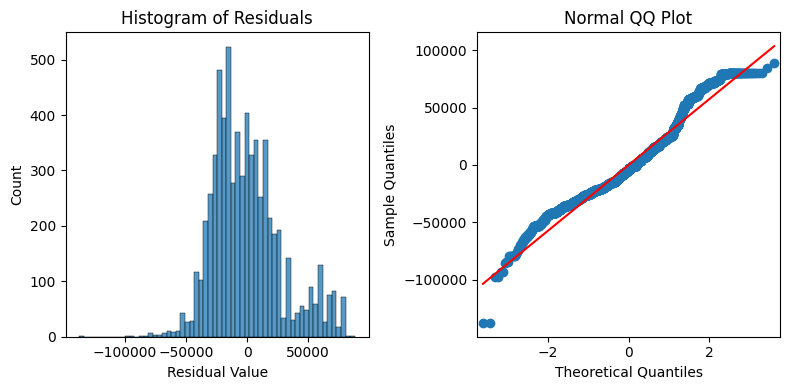

In [51]:
# Calculate the residuals.

### YOUR CODE HERE ###

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.


sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.


sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

We observe the points stick around the straight diagonal line on the Q-Q plot and a normal distribution slightly skewed.
This meets our requirement for normality.

4. verify the constant variance (homoscedasticity) assumption is met for this model.

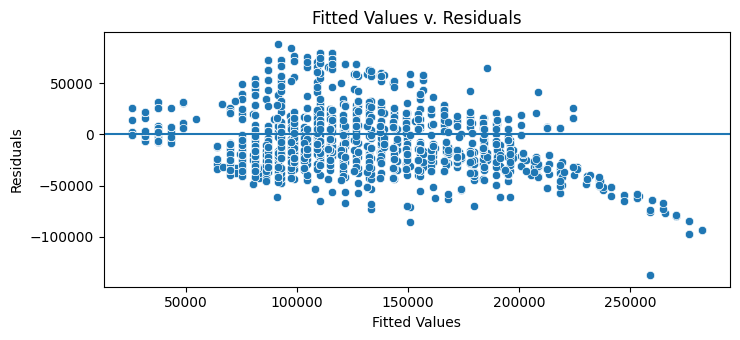

In [52]:
# Create a scatter plot with the fitted values from the model and the residuals.

### YOUR CODE HERE ###

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ###

fig.axhline(0)

# Show the plot
plt.show()

 The data points seem to be scattered randomly across the line where residuals equal 0. Our homoscedasticity assumption is met.

5. Since we only have one continuous independent variable in our model. The multicollinearity assumption is not required.

Our five model assumptions are satisfied. Therefore, we can proceed to interpretation.

###**Interpretation of the model**

This model explains up to 70.5% of the variation in salary.

**How do years of experience affect salary?**
- For every one more year of experience, while the level of education remains constant, the salary is expected to increase by $5,796.36 on average. We are up to 95% confident that the true value range from 5654.37 to 5,938.35.

**How does education level affect salary?**

While holding constant the years of experience:
- Someone with a High School diploma earns $38,140 less, on average, than someone with a bachelor's degree. We are up to 95% confident that the true value range from -41,000 to -35,300.

- Someone with a Master's degree earns $10,460 more, on average, than someone with Bachelor's degree. We are up to 95% confident that the true value range from 8,698.16 to 12,200.

- Someone with Ph.D. earns $21,310 more, on average, than someone with a bachelor's degree. We are up to 95% confident that the true value range from 19,100 to 23,500.

The coefficients reveal that `education_level` was the feature with the greatest weight in the model’s
final prediction.

###**One-way ANOVA test**

The one-way ANOVA test is a statistical test that is used to compare the means of two or more groups. It is a powerful tool that can be used to determine whether there is a statistically significant difference between the means of the groups.

For example, we can use the one-way ANOVA test to determine whether there is a difference in the mean salary among `education_level`.

**The null hypothesis** is that there is no difference in salary based on the education levels.

**The alternative hypothesis** is that there is a difference in salary based on education levels.

In [53]:
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(education_level),3.0,7.882260e+12,2.627420e+12,3206.655272,0.0
years_of_experience,1.0,5.247177e+12,5.247177e+12,6403.959023,0.0
Residual,6689.0,5.480730e+12,8.193646e+08,NaN,NaN


The F-test statistic is 3206.66 and the p-value is  0.0. Because the p-value is less than 0.05, we reject the null hypothesis that there is no difference in salary based on the education levels.

###**ANOVA post hoc test**


Since we have significant results from the one-way ANOVA test, we will apply ANOVA post hoc tests, such as the Tukey’s HSD post hoc test.

The Tukey’s HSD post hoc test compares if there is a significant difference between each pair of categories for education levels.

In [54]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_oneway = pairwise_tukeyhsd(endog = df["salary"], groups = df["education_level"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Bachelor's,High School,-58470.2664,0.0,-63680.2784,-53260.2544,True
Bachelor's,Master's,34935.0959,0.0,31901.7085,37968.4833,True
Bachelor's,PhD,70595.1644,0.0,67241.2288,73949.1,True
High School,Master's,93405.3623,0.0,87989.7758,98820.9487,True
High School,PhD,129065.4308,0.0,123464.0005,134666.8611,True
Master's,PhD,35660.0685,0.0,31994.9307,39325.2064,True


###**Interpretation of the Tukey HSD test**

Each row compares different groups, indicates whether we can reject the null hypothesis that there is no significant difference between the Sales of these two groups.

We can reject the null hypotheses for all the pairwise comparisons that compare the group between them.

##**Insights to share with Stakeholders**

**The following summarises our findings.**

<br>

1. on average, there is a difference in salary per category in education level. We can observe that as someone goes from High School up to PhD, his salary tend to be increased on average.

This table illustrates the fact.

| education_level |	average_salary |
| --------------- | ---------------- |
|	Bachelor's |	95.1 K |
|	High School	| 36.7 K |
|	Master's	| 130.1 K |
|	PhD	| 165.7 K |


<br>

2. Some Data Scientists, Software Engineers and Product Managers with bachelor's or master's degrees earn more than $150,000 a year, even with less than 5 years of experience.

<br>

3. Regarding the most popular `job_title` among education_level:
- Sales are among the top job title for High School diplomas within various levels.
- Bachelor's and Master's degrees often lead to Data Analyst, Backend Developer, Full Stack Engineer, Product Manager, and Software Engineer positions.
- Data Scientist, Software Engineer Manager, and Senior Project Engineer are among the top job title for Master's degrees and Ph.D.
- Research seems to be a field only among the top job title for Ph.D.

<br>

4. Management positions are the most paid job. Especially, Chief Technology Officer and CEO are the highest-paid jobs with roughly  $250,000 a year.

<br>

5. A Pearson test indicates that salary and years of experience have a linear relationship. The Pearson correlation coefficient is ~0.81 with a P-value of 0.0. This points to a strong positive linear relationship between the two variables. As one variable increases, the other variable also follows.

<br>

6. An ANOVA test proves that `salary` and `education_level` are correlated, and a P-value of 0.0 was computed. Hence, the confirmation that the mean of the groups `in education_level` is all different regarding salary.

<br>

**Linear Regression**

This model, with the two independent variables of interest `education_level` and `salary`, explains up to 70.5% of the variation in `salary`.

<br>

*How do years of experience affect salary?*

- For every one more year of experience, while the level of education remains constant, the salary is expected to increase by $5,796.36 on average. We are up to 95% confident that the actual value varies from 5,654.37 to 5,938.35.


<br>

*How do education levels affect salary?*

While holding constant the years of experience:

- Someone with a High School diploma earns $38,140 less, on average, than someone with a bachelor's degree. We are up to 95% confident that the actual value range from -41,000 to -35,300.

- Someone with a Master's degree earns $10,460 more, on average, than someone with Bachelor's degree. We are up to 95% confident that the actual value range from 8,698.16 to 12,200.

- Someone with Ph.D. earns $21,310 more, on average, than someone with a bachelor's degree. We are up to 95% confident that the true actual range from 19,100 to 23,500.

The coefficients reveal that `education_level` was the feature with the heaviest weight in the model’s final prediction.


**Conclusion and perspective**

We are glad to see, without looking for additional data or modifying the project scope, the data is sufficient to allow us to address the need and answer the fundamental questions of our study case. If we had more time, we would want to check for the most prevalent occupations by age group and look into the hypothesis that you need a degree to be a Data Analyst or Data Scientist. But doing so, in this project, would also mean being out of scope. With that being said, this dataset stays with lots of untapped potential.

Thank you for sticking around with me up to there. There is more than one way to achieve this type of work. Having any suggestions?

ralphguerson@gmail.com